<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipython-input-3727251253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


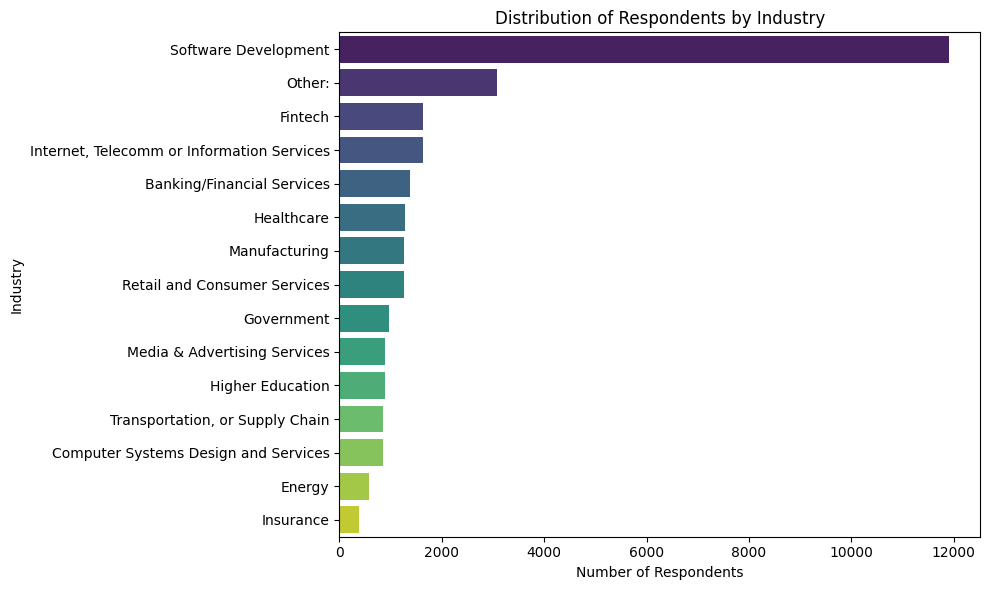

In [3]:
##Write your code here

# 1. Calculate the frequency of each industry
industry_counts = df['Industry'].value_counts()

# 2. Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')

# 3. Add titles and labels
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')

# 4. Display the plot
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
comp = df['ConvertedCompYearly'].dropna()
mean_comp = comp.mean()
std_dev_comp = comp.std()
upper_threshold = mean_comp + 3*std_dev_comp
outliers_std = df[df['ConvertedCompYearly'] > upper_threshold]
# better way to do this

In [5]:
##Write your code here
# Calculate basic statistics for the ConvertedCompYearly column
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_dev_comp = df['ConvertedCompYearly'].std()
print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_dev_comp:.2f}")

# Define the upper threshold (3 standard deviations above the mean)
upper_threshold = mean_comp + (3 * std_dev_comp)

# Identify rows where compensation exceeds the threshold
outliers_std = df[df['ConvertedCompYearly'] > upper_threshold]

print(f"Threshold for outliers: {upper_threshold:.2f}")
print(f"Number of respondents above this threshold: {len(outliers_std)}")


Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97
Threshold for outliers: 646426.21
Number of respondents above this threshold: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 978


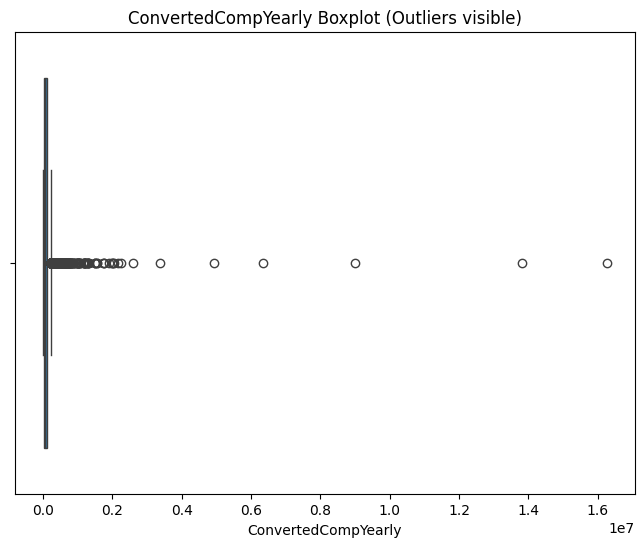

In [6]:
comp = df['ConvertedCompYearly'].dropna()

Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print("Number of outliers:", len(outliers))

plt.figure(figsize=(8,6))
sns.boxplot(x=comp)
plt.title("ConvertedCompYearly Boxplot (Outliers visible)")
plt.show()
# chatGPT version

IQR:75259.5
Lower Bound:-80177.25
Upper Bound:220860.75
Number of outliers:978


<Axes: xlabel='ConvertedCompYearly'>

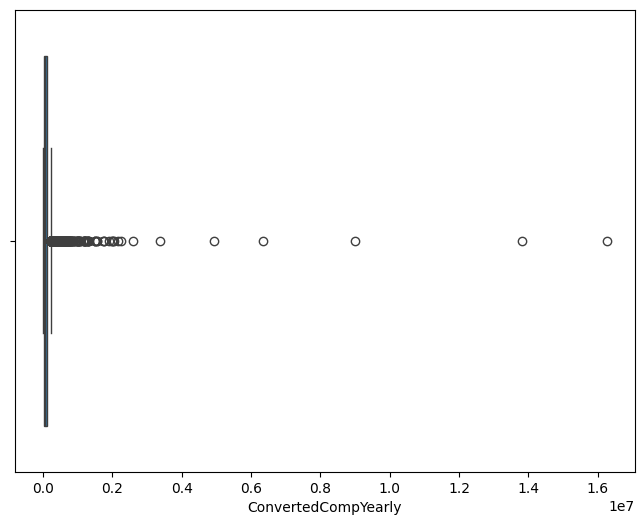

In [7]:
##Write your code here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

IQR =Q3-Q1
print(f'IQR:{IQR}')

#Determine the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound:{lower_bound}')
print(f'Upper Bound:{upper_bound}')

#Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f'Number of outliers:{len(outliers)}')

#Count and visualize outliers using a box plot.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedCompYearly'])

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
##Write your code here
# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
#Validate the size of the new DataFrame.
print(f'Original DataFrame size:{len(df)}')
print(f'New DataFrame size:{len(df_no_outliers)}')

Original DataFrame size:65437
New DataFrame size:22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


/tmp/ipython-input-4280137314.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_map)
/tmp/ipython-input-4280137314.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['WorkExp_num'] = pd.to_numeric(df_no_outliers.get('WorkExp'), errors='coerce')
/tmp/ipython-input-4280137314.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


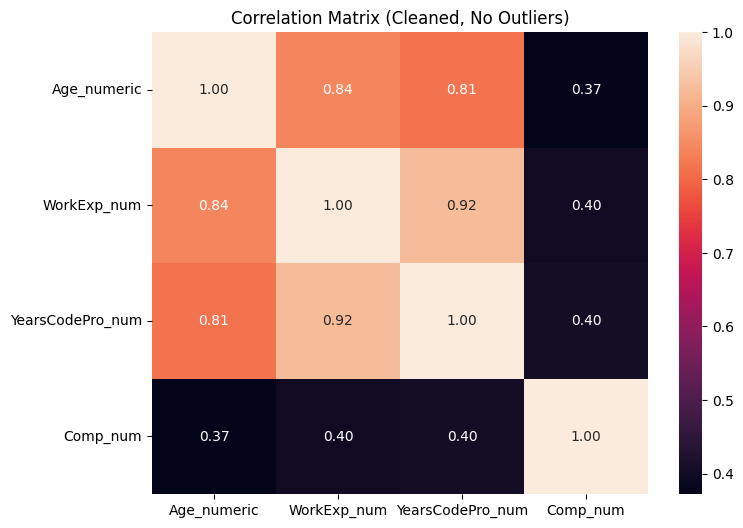

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Convert Age categories to numeric midpoint values
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_map)

# Ensure numeric types for correlation
df_no_outliers['WorkExp_num'] = pd.to_numeric(df_no_outliers.get('WorkExp'), errors='coerce')
df_no_outliers['YearsCodePro_num'] = pd.to_numeric(df_no_outliers.get('YearsCodePro'), errors='coerce')
df_no_outliers['Comp_num'] = pd.to_numeric(df_no_outliers.get('ConvertedCompYearly'), errors='coerce')

numeric_df = df_no_outliers[['Age_numeric', 'WorkExp_num', 'YearsCodePro_num', 'Comp_num']].dropna()

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Cleaned, No Outliers)")
plt.show()

Correlation of Age with other variables:
Age_numeric            1.000000
WorkExp                0.848567
ConvertedCompYearly    0.122167
JobSat                 0.069753
CompTotal             -0.002695
JobSatPoints_1        -0.027608
ResponseId            -0.038275
JobSatPoints_8        -0.046113
JobSatPoints_6        -0.049930
JobSatPoints_4        -0.076200
JobSatPoints_9        -0.081717
JobSatPoints_7        -0.083166
JobSatPoints_5        -0.101506
JobSatPoints_11       -0.107109
JobSatPoints_10       -0.114556
Name: Age_numeric, dtype: float64


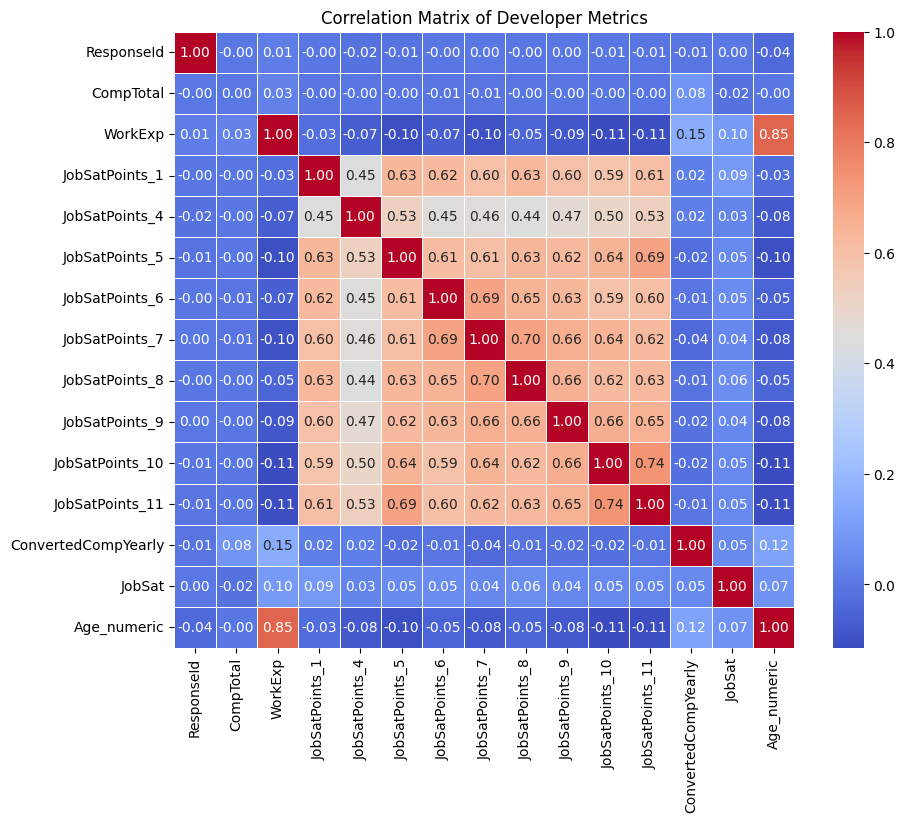

In [10]:
##Write your code here
#value counts on Age
import numpy as np
df['Age'].value_counts()
# Define the mapping based on the dataset's unique values
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

# Apply the mapping to create a new numeric column
df['Age_numeric'] = df['Age'].map(age_map)

# Select numeric columns (ensure columns like YearsCode are converted to numeric first)
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlations specifically for Age_numeric
age_correlations = numeric_df.corr()['Age_numeric'].sort_values(ascending=False)

print("Correlation of Age with other variables:")
print(age_correlations)

plt.figure(figsize=(10, 8))

# Calculate the full correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Developer Metrics')
plt.show()

In [11]:
salary = df['ConvertedCompYearly'].dropna()

mean_salary = salary.mean()
median_salary = salary.median()
std_salary = salary.std()

threshold = mean_salary + 3 * std_salary

print("Mean:", mean_salary)
print("Median:", median_salary)
print("Std Dev:", std_salary)
print("Outlier Threshold:", threshold)


Mean: 86155.28726264134
Median: 65000.0
Std Dev: 186756.9730862951
Outlier Threshold: 646426.2065215267


In [12]:
df_clean = df[df['ConvertedCompYearly'] <= threshold].copy()

print("Original rows:", len(df))
print("After removing outliers:", len(df_clean))


Original rows: 65437
After removing outliers: 23346


In [13]:
df_clean[['ConvertedCompYearly']].to_csv("salary_clean.csv", index=False)
print("Saved salary_clean.csv")


Saved salary_clean.csv


In [14]:
import pandas as pd

df = pd.read_csv("salary_clean.csv")

# Remove unrealistically small salaries (e.g., < $5,000/year)
df = df[df['ConvertedCompYearly'] >= 5000]

# Recalculate stats
mean = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()

upper = mean + 3 * std

print("Mean:", mean)
print("Std:", std)
print("Upper threshold:", upper)

# Remove extreme high outliers
df_final = df[df['ConvertedCompYearly'] <= upper]

print("Rows after cleaning:", len(df_final))

# Save cleaned version
df_final.to_csv("salary_dashboard.csv", index=False)


Mean: 85778.5186084884
Std: 68774.10068966991
Upper threshold: 292100.8206774981
Rows after cleaning: 21436


In [16]:
from google.colab import files
files.download("salary_dashboard.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
